In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## The Convolution Formula ##

Let $X$ and $Y$ be discrete random variables and let $S = X+Y$. We know that a good way to find the distribution of $S$ is to partition the event $\{ S = s\}$ according to values of $X$. That is,

$$
P(S = s) ~ = ~ \sum_{\text{all }x} P(X = x, Y = s-x)
$$

If $X$ and $Y$ are independent, this becomes the *discrete convolution formula*:

$$
P(S = s) ~ = ~ \sum_{\text{all }x} P(X = x)P(Y = s-x)
$$

This formula has a straightforward continuous analog. Let $X$ and $Y$ be continuous random variables with joint density $f$, and let $S = X+Y$. Then the density of $S$ is given by

$$
f_S(s) ~ = ~ \int_{-\infty}^\infty f(x, s-x)dx
$$

which becomes the *convolution formula* when $X$ and $Y$ are independent:

$$
f_S(s) ~ = ~ \int_{-\infty}^\infty f_X(x)f_Y(s-x)dx
$$

### Sum of Two IID Exponential Random Variables ###
Let $X$ and $Y$ be i.i.d. exponential $(\lambda)$ random variables and let $S = X+Y$. For the sum to be $s > 0$, neither $X$ nor $Y$ can exceed $s$. The convolution formula says that the density of $S$ is given by

$$
\begin{align*}
f_S(s) ~ &= ~ \int_0^s \lambda e^{-\lambda x} \lambda e^{-\lambda(s-x)} dx \\ \\
&= ~ \lambda^2 e^{-\lambda s} \int_0^s dx \\ \\
&=~  \lambda^2 s e^{-\lambda s}
\end{align*}
$$

That's the gamma $(2, \lambda)$ density, consistent with the claim made in the previous chapter about sums of independent gamma random variables.

Sometimes, the density of a sum can be found without the convolution formula.

### Sum of Two IID Uniform $(0, 1)$ Random Variables ###
Let $S = U_1 + U_2$ where the $U_i$'s are i.i.d. uniform on $(0, 1)$. The gold stripes in the graph below show the events $\{ S \in ds \}$ for various values of $S$.

/Users/dominiccroce/anaconda3/envs/textbook/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


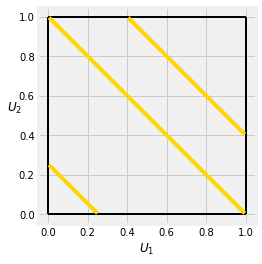

In [2]:
# HIDDEN
plt.plot([0, 1], [1, 1], color='k', lw=2)
plt.plot([1, 1], [0, 1], color='k', lw=2)
plt.plot([0, 1], [0, 0], color='k', lw=2)
plt.plot([0, 0], [0, 1], color='k', lw=2)
plt.plot([0.005, 0.25], [0.25, 0.005], color='gold', lw=4)
plt.plot([0.005, 0.995], [0.995, 0.005], color='gold', lw=4)
plt.plot([0.405, 0.995], [0.995, 0.405], color='gold', lw=4)
plt.ylim(-0.05, 1.05)
plt.xlim(-0.05, 1.05)
plt.axes().set_aspect('equal')
plt.xlabel('$U_1$')
plt.ylabel('$U_2$', rotation=0);

The joint density surface is flat. So the shape of the density of $S$ depends only on the lengths of the stripes, which increase linearly between $s = 0$ and $s = 1$ and then decrease linearly between $s = 1$ and $s = 2$. So the joint density of $S$ is triangular. The height of the triangle is 1 since the area of the triangle has to be 1.

/Users/dominiccroce/anaconda3/envs/textbook/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


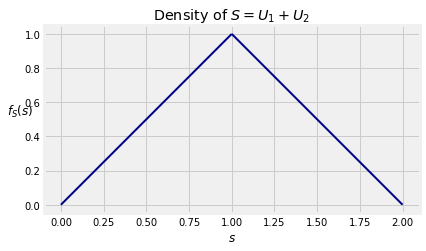

In [3]:
# HIDDEN
plt.plot([0, 1], [0, 1], color='darkblue', lw=2)
plt.plot([1, 2], [1, 0], color='darkblue', lw=2)
plt.ylim(-0.05, 1.05)
plt.axes().set_aspect('equal')
plt.xlabel('$s$')
plt.ylabel('$f_S(s)$', rotation = 0)
plt.title('Density of $S = U_1 + U_2$');

At the other end of the difficulty scale, the integral in the convolution formula can sometimes be quite intractable. In the rest of the chapter we will develop a different way of deriving distributions of sums.